## Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings("ignore")


## Sobre os dados

Os dados utilizados estão disponíveis em <https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data> e apresentam informações das atividades do Airbnb na cidade de NEW YORK. Utilizaremos essas informações para construir e testar diferentes tipos de modelos de regressão e apresentar algumas ferramentas úteis para uma análise exploratória inicial.


In [2]:
dados = pd.read_csv('train.csv')

## Dicionário de dados

* id : identificador único

* name : nome da lista

* host_id : identificador único para o host da listagem

* host_name : nome do host

* neighbourhood_group : bairro onde a listagem está localizada (por exemplo, "Manhattan")

* neighbourhood : bairro onde a listagem está localizada (por exemplo, "East Harlem")

* latitude : latitude do local da listagem

* longitude : longitude da localização da listagem

* room_type : tipo de quarto ('Casa / apto inteiro', 'Quarto privado' ou 'Quarto compartilhado')

* price : custo por uma noite de reserva da listagem (isso é o que você está prevendo; presente apenas em `train.csv`)

* minimum_nights : número mínimo de noites necessárias para reservar o anúncio

* number_of_reviews : número de comentários que a listagem tem

* last_review : data em que a última revisão da listagem foi feita

* reviews_per_month : número de avaliações que a listagem recebe por mês, em média

* calculated_host_listings_count : número de listagem que o host possui

* availability_365 : número de dias do ano em que a lista está disponível



Ao todo temos 16 colunas e 34226 linhas.

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34217 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34212 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     

Temos também algumas informações faltantes, com destaque para as colunas *last_review* e *reviews_per_month*, com $20,5\%$ de dados faltantes.

In [4]:
#dados nulos
dados.isnull().mean()*100


id                                 0.000000
name                               0.026296
host_id                            0.000000
host_name                          0.040905
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.475662
reviews_per_month                 20.475662
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

## Análise Descritiva

1. RESUMO ESTATÍSTICO

In [5]:
#variáveis numéricas
dados.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27218.000000,34226.000000,34226.000000
mean,1.908483e+07,6.775572e+07,40.728848,-73.952119,152.004120,7.055747,23.206597,1.380055,7.176416,113.523257
std,1.098078e+07,7.876004e+07,0.054633,0.046084,234.475161,20.703031,44.328567,1.707888,32.959383,131.915784
min,2.539000e+03,2.438000e+03,40.506410,-74.242850,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.509256e+06,7.858210e+06,40.689930,-73.983017,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.975986e+07,3.087885e+07,40.722900,-73.955675,105.000000,3.000000,5.000000,0.710000,1.000000,46.000000
75%,2.921902e+07,1.074344e+08,40.763157,-73.936120,175.000000,5.000000,23.000000,2.030000,2.000000,230.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.716900,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
#variáveis categóricas
dados.describe(include = 'object')
#dados.columns

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,34217,34212,34226,34226,34226,27218
unique,33704,9151,5,217,3,1675
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,15,309,15146,2720,17807,981


2. GRÁFICO DE DISPERSÃO (DESTACADOS POR LOCALIDADE)

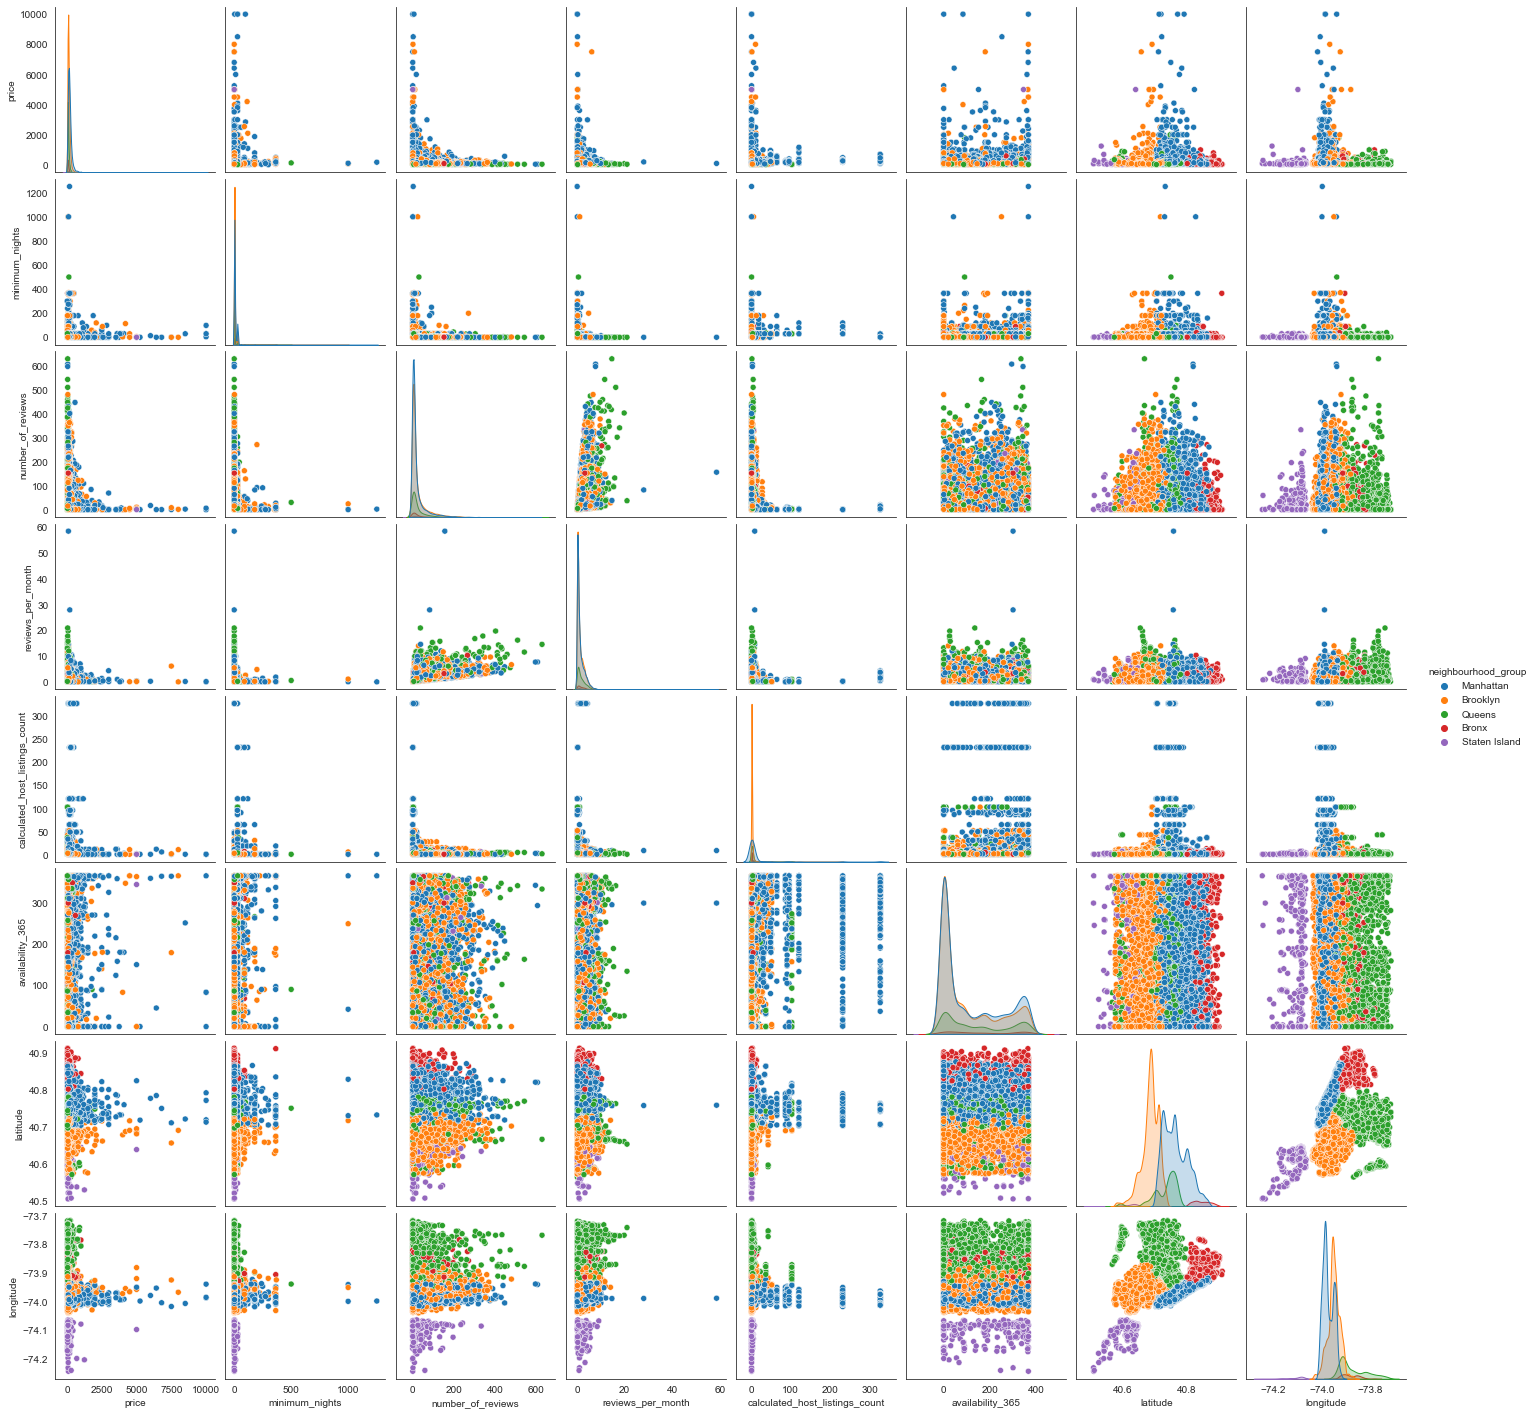

In [7]:
colunas = ['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review',
                  'reviews_per_month','calculated_host_listings_count', 'availability_365', 'latitude', 'longitude']
dados_pairplot = pd.DataFrame(dados, columns=colunas)
sns.set_style("white")
sns.pairplot(dados_pairplot, hue="neighbourhood_group", height=2.5)


3. DISTRIBUIÇÃO DOS PREÇOS POR LOCALIDADE

[Text(0.5, 0, 'Localidade'), Text(0, 0.5, 'Preço')]

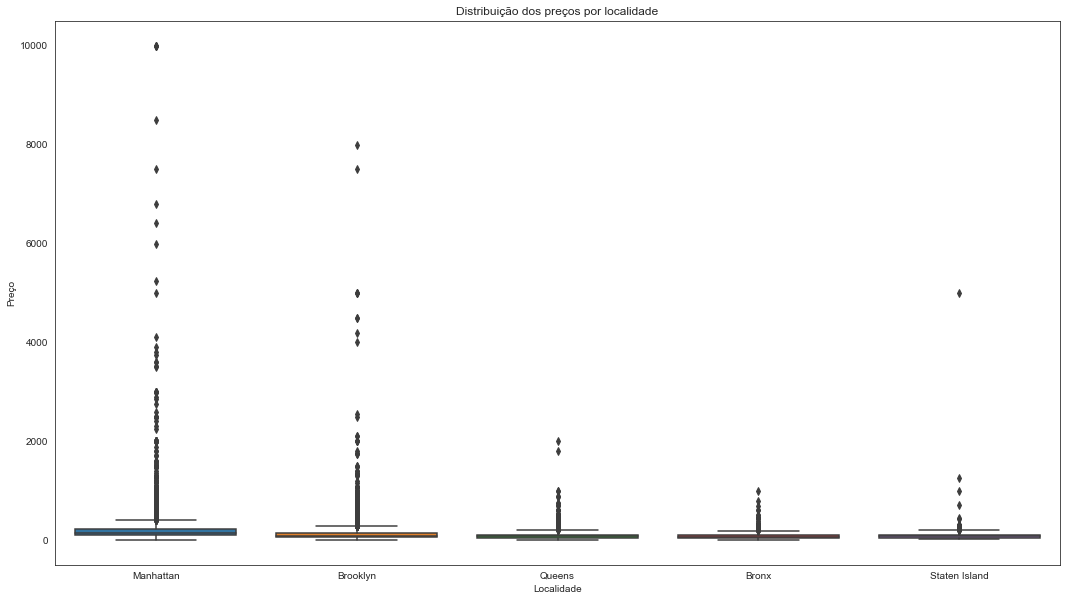

In [8]:
sns.set_style("white")
plt.figure(figsize=(18, 10))
ax = sns.boxplot(data = dados, x="neighbourhood_group", y="price")
plt.title("Distribuição dos preços por localidade")
ax.set(xlabel = 'Localidade', ylabel='Preço')
#sns.swarmplot(data=dados,  x="neighbourhood_group", y="price", color=".25")

In [9]:
#percentil 90
p_95 = np.percentile(dados['price'],95)
p_95

350.0

Em relação aos preços, percebe-se uma variação maior em Manhattan, com outliers em todas as localidades e, além disso, $95\%$ da dsitribuição tem valor abaixo de $ \$350.00$. A visualização nos ajuda a comprova isso, visto que os maiores valores estão localizados em uma mesma região.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

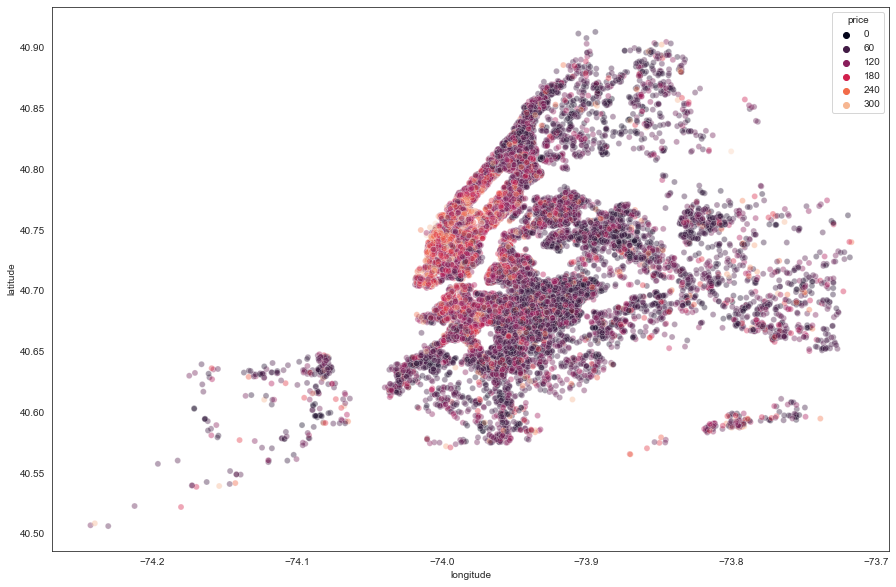

In [10]:
sns.set_style("white")
plt.figure(figsize=(15, 10))
sns.scatterplot(data = dados[dados['price']<350], x='longitude', y ='latitude', hue='price', alpha=0.4, palette = "rocket")

4. EM RELAÇÃO AO TIPO DE QUARTO:

[Text(0.5, 0, 'Localidade'), Text(0, 0.5, 'Quantidade')]

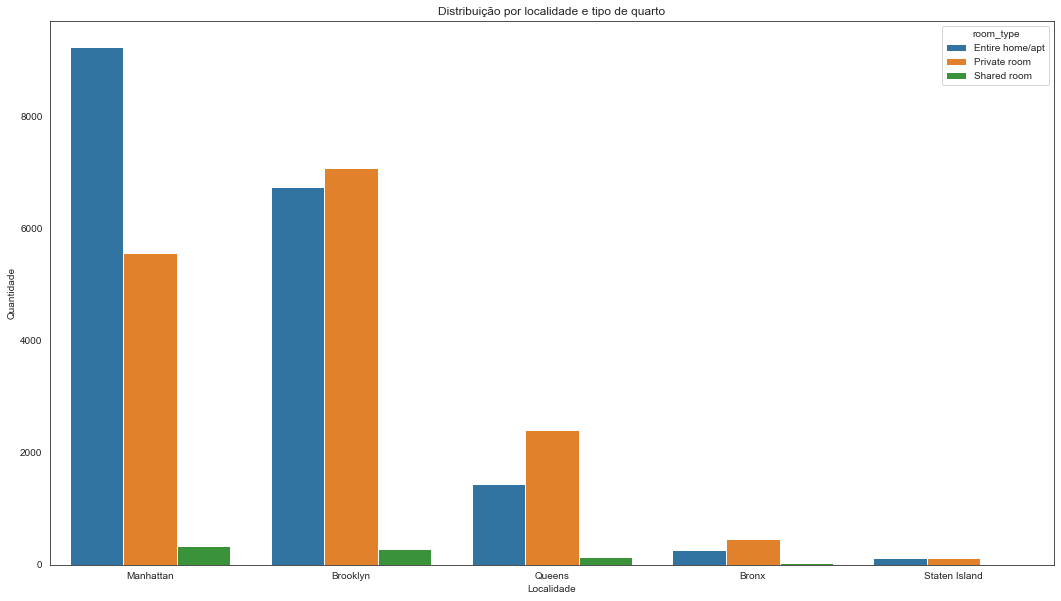

In [11]:
sns.set_style("white")
plt.figure(figsize=(18, 10))
ax = sns.countplot(dados.neighbourhood_group, hue = dados.room_type)
plt.title('Distribuição por localidade e tipo de quarto')
ax.set(xlabel='Localidade', ylabel='Quantidade')

6. AINDA SOBRE OS PREÇOS:

Destaque para a forte assimetria presente na distribuição. Vamos utilizar uma transformação logarítmica objetivando minimizar essa assimetria.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

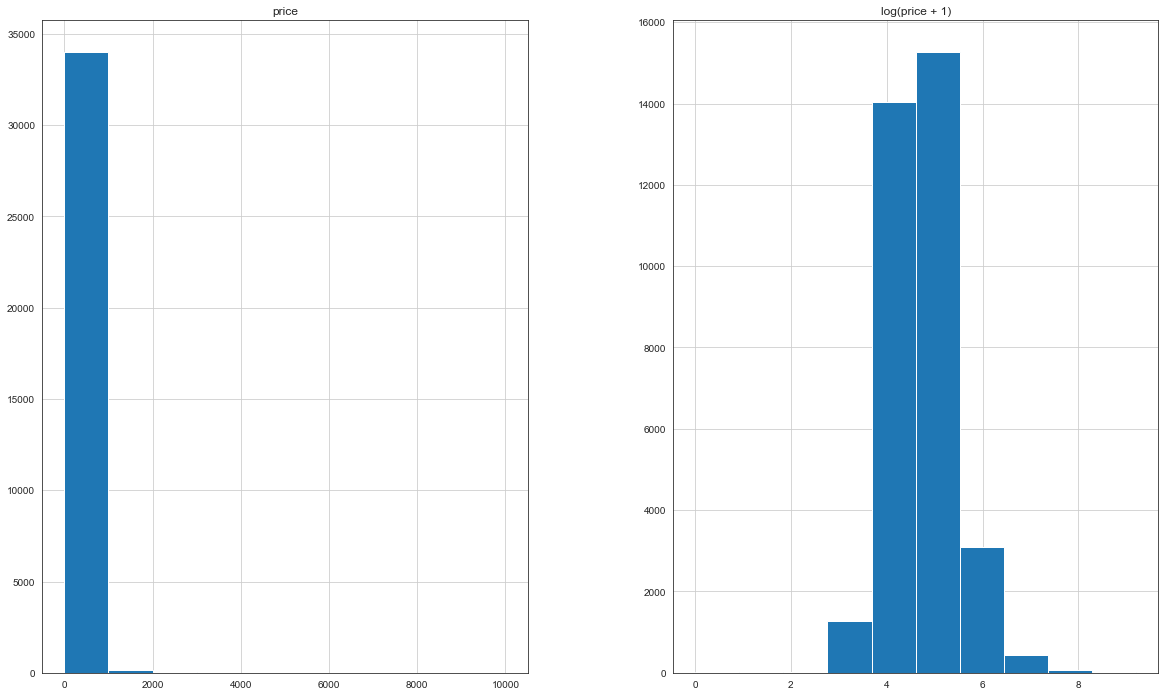

In [12]:
plt.rcParams['figure.figsize'] = (20.0, 12.0)
prices = pd.DataFrame({"price":dados["price"], "log(price + 1)":np.log1p(dados["price"])})
prices.hist()

In [13]:
#transformation target
dados['price'] = np.log1p(dados['price'])
dados.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9901706,Cute big one bedroom,1904415,Natalie,Manhattan,Upper West Side,40.77789,-73.97701,Entire home/apt,5.198497,1,0,NaN,NaN,1,0
1,299531,Feel like you never leave your home,1220404,Tom,Brooklyn,East New York,40.66795,-73.89232,Entire home/apt,4.615121,1,119,2019-06-30,1.39,2,289
2,2461439,Pristine Lower East Side Sanctuary,12586492,Sausan,Manhattan,Lower East Side,40.72007,-73.98946,Entire home/apt,4.897840,14,177,2019-05-03,2.82,2,221
3,127387,"Luxe, Spacious 2BR 2BA Nr Trains",23276,Katharine,Brooklyn,Gowanus,40.66862,-73.99260,Entire home/apt,5.564520,30,3,2014-08-04,0.03,1,316
4,629315,1BD brownstone apt in Fort Greene!,2397437,Lauren,Brooklyn,Fort Greene,40.68935,-73.96950,Entire home/apt,4.795791,3,22,2015-10-28,0.27,1,189


7. CORRELAÇÃO ENTRE AS VARIÁVEIS:

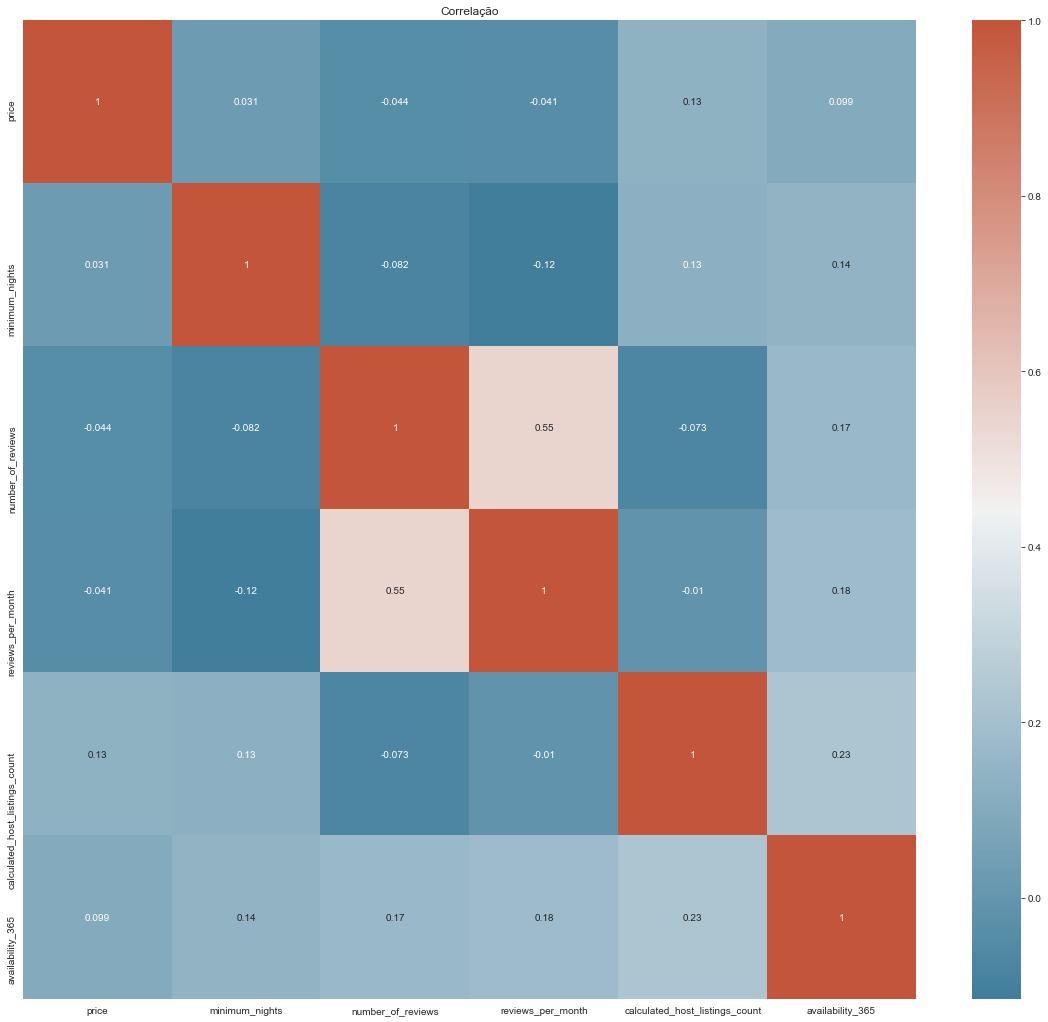

In [14]:
# Correlação
sns.set_style("white")
colunas = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']
corr = pd.DataFrame(dados, columns=colunas)
corr = corr.corr (method = 'pearson')
plt.figure (figsize = (20,18))
plt.title ("Correlação")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap (corr, annot = True,cmap=cmap)
plt.show ()

A maior (e praticamente única) correlação observada é entre *reviews_per_month* e *number_of_reviews*, com $0.55$.

## Modelo

Vamos testar alguns modelos para previsão da variável *Price*. Para tantos, seguiremos o seguinte roteiro:

*1.* Carregar as bibliotecas necessárias para a construção dos modelos de: **regressão linear, regressão lasso, light gbm** e **random forest**;

*2.* Criação de uma nova variável chamada *days_diference*, que levará em consideração a amplitude entre o maior dia da variável *last_review* e o dia de registro para cada observação.

*3. One hot encoding* para as variáveis categóricas "neighbourhood_group" e "room_type";

*4.* Remoção das variáveis *id*, *host_name*, *name*, *neighbourhood* e *last_review*, consideradas não impactantes para a modelagem, sendo que esta última foi substituída por *days_diference* anteriormente criada;

*5.* Divisão dos dados em treino e teste, na proporção de $75$ e $25$;

*6.* Para os modelos de regressão Linear e Regressão Lasso, utilizaremos a padronização dos dados com a função MinMaxScaler (colocará as variáveis entre 0 e 1), cuidando para que não haja vazamento de informações para os dados de teste. 

*7.* Imputação dos valores ausentes com a função *KNNImputer*;

*8.* Treino do modelo e verificação da performance nos dados de teste, olhando para o $RMSE$ e o $R^{2}$, além de comparar o valor previsto pelo modelo com o valor real (nos dados de teste), apenas para fins comparativos.

### Carregando as bibliotecas

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics


In [16]:
#coluna com a diferenca de dias do last_review em relação ao ultimo registro de dia
dados['last_review']=pd.to_datetime(dados['last_review'])
dados['days_diference'] = (dados['last_review'].max() - dados['last_review']).dt.days
dados = dados.drop(columns = ['neighbourhood'], axis=1)

#variáveis dummies
categoricas = dados[["neighbourhood_group", "room_type"]]
categoricas_dummies = pd.get_dummies(categoricas, drop_first=True)

#removendo as colunas categoricas para incluir as dummies
dados = dados.drop(["neighbourhood_group", "room_type"], axis=1)
dados = pd.concat([dados, categoricas_dummies], axis=1)

#treino e teste
X = dados.drop(columns=['price', 'id', 'host_name', 'name', 'last_review']) #retirando as variáveis não importantes
y = dados.price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

#pre-processamento dos dados
scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


#pre-processamento dos dados
#imputando os valores ausentes nos dados de treino (knn imputer) nos dados copiados

X_train_knn_imputed = X_train.copy(deep=True)
X_test_knn_imputed = X_test.copy(deep=True)
# transformação
knn_imp = KNNImputer(n_neighbors=3).fit(X_train_knn_imputed)
# Fit/transform train
X_train_knn_imputed = pd.DataFrame(knn_imp.transform(X_train_knn_imputed), columns=X_train_knn_imputed.columns)
#transform test
X_test_knn_imputed = pd.DataFrame(knn_imp.transform(X_test_knn_imputed), columns=X_test_knn_imputed.columns)




### MODELO 1: REGRESSÃO LINEAR PONDERADA

In [17]:
#Linear Regression com peso
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lm = LinearRegression()
lm.fit(X_train_knn_imputed, y_train, sample_weight = X_train_knn_imputed.days_diference)

#predict
lm_predict = lm.predict(X_test_knn_imputed)

#comparando
df_comp = pd.DataFrame({'Real': np.expm1(y_test),
                       'Predição_LM' : np.expm1(lm_predict)})

df_comp['Predição_LM']=df_comp['Predição_LM'].round(2)

df_comp.head(15)


,Real,Predição_LM
4556,110.0,122.97
31590,290.0,233.73
30073,125.0,134.56
19566,250.0,193.43
13125,259.0,176.40
2540,45.0,66.85
27850,650.0,193.27
21369,65.0,69.79
20656,50.0,63.93
2649,330.0,239.17


In [18]:
print('Preço médio:', np.round(np.mean(y_train), 2))  
print('Desvio Padrão do preço:', np.round(np.std(y_train), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test_knn_imputed))), 2))
print('R2 score train:', np.round(r2_score(y_train, lm.predict(X_train_knn_imputed), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lm.predict(X_test_knn_imputed), multioutput='variance_weighted'), 2))

Preço médio: 4.74
Desvio Padrão do preço: 0.69
RMSE: 0.51
R2 score train: 0.48
R2 score test: 0.47


### MODELO 2: REGRESSÃO LASSO

In [19]:
#Lasso
#fit
cv = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = np.linspace(0,0.2,20)
lasso = LassoCV(alphas=alphas, cv=cv, n_jobs=-1, verbose=1)
lasso.fit(X_train_knn_imputed, y_train)

#predict
lasso_pred = lasso.predict(X_test_knn_imputed)

#comparando
df_comp = pd.DataFrame({'Real': np.expm1(y_test),
                       'Predição' : np.expm1(lasso_pred)})

df_comp['Predição']=df_comp['Predição'].round(2)

df_comp.head(15)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
....................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


,Real,Predição
4556,110.0,109.75
31590,290.0,228.82
30073,125.0,137.46
19566,250.0,203.58
13125,259.0,194.81
2540,45.0,65.88
27850,650.0,199.64
21369,65.0,66.92
20656,50.0,63.40
2649,330.0,229.83


In [20]:
print('Preço médio:', np.round(np.mean(y_train), 2))  
print('Desvio Padrão do preço:', np.round(np.std(y_train), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test_knn_imputed))), 2))
print('R2 score train:', np.round(r2_score(y_train, lasso.predict(X_train_knn_imputed), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lasso.predict(X_test_knn_imputed), multioutput='variance_weighted'), 2))


Preço médio: 4.74
Desvio Padrão do preço: 0.69
RMSE: 0.5
R2 score train: 0.49
R2 score test: 0.49


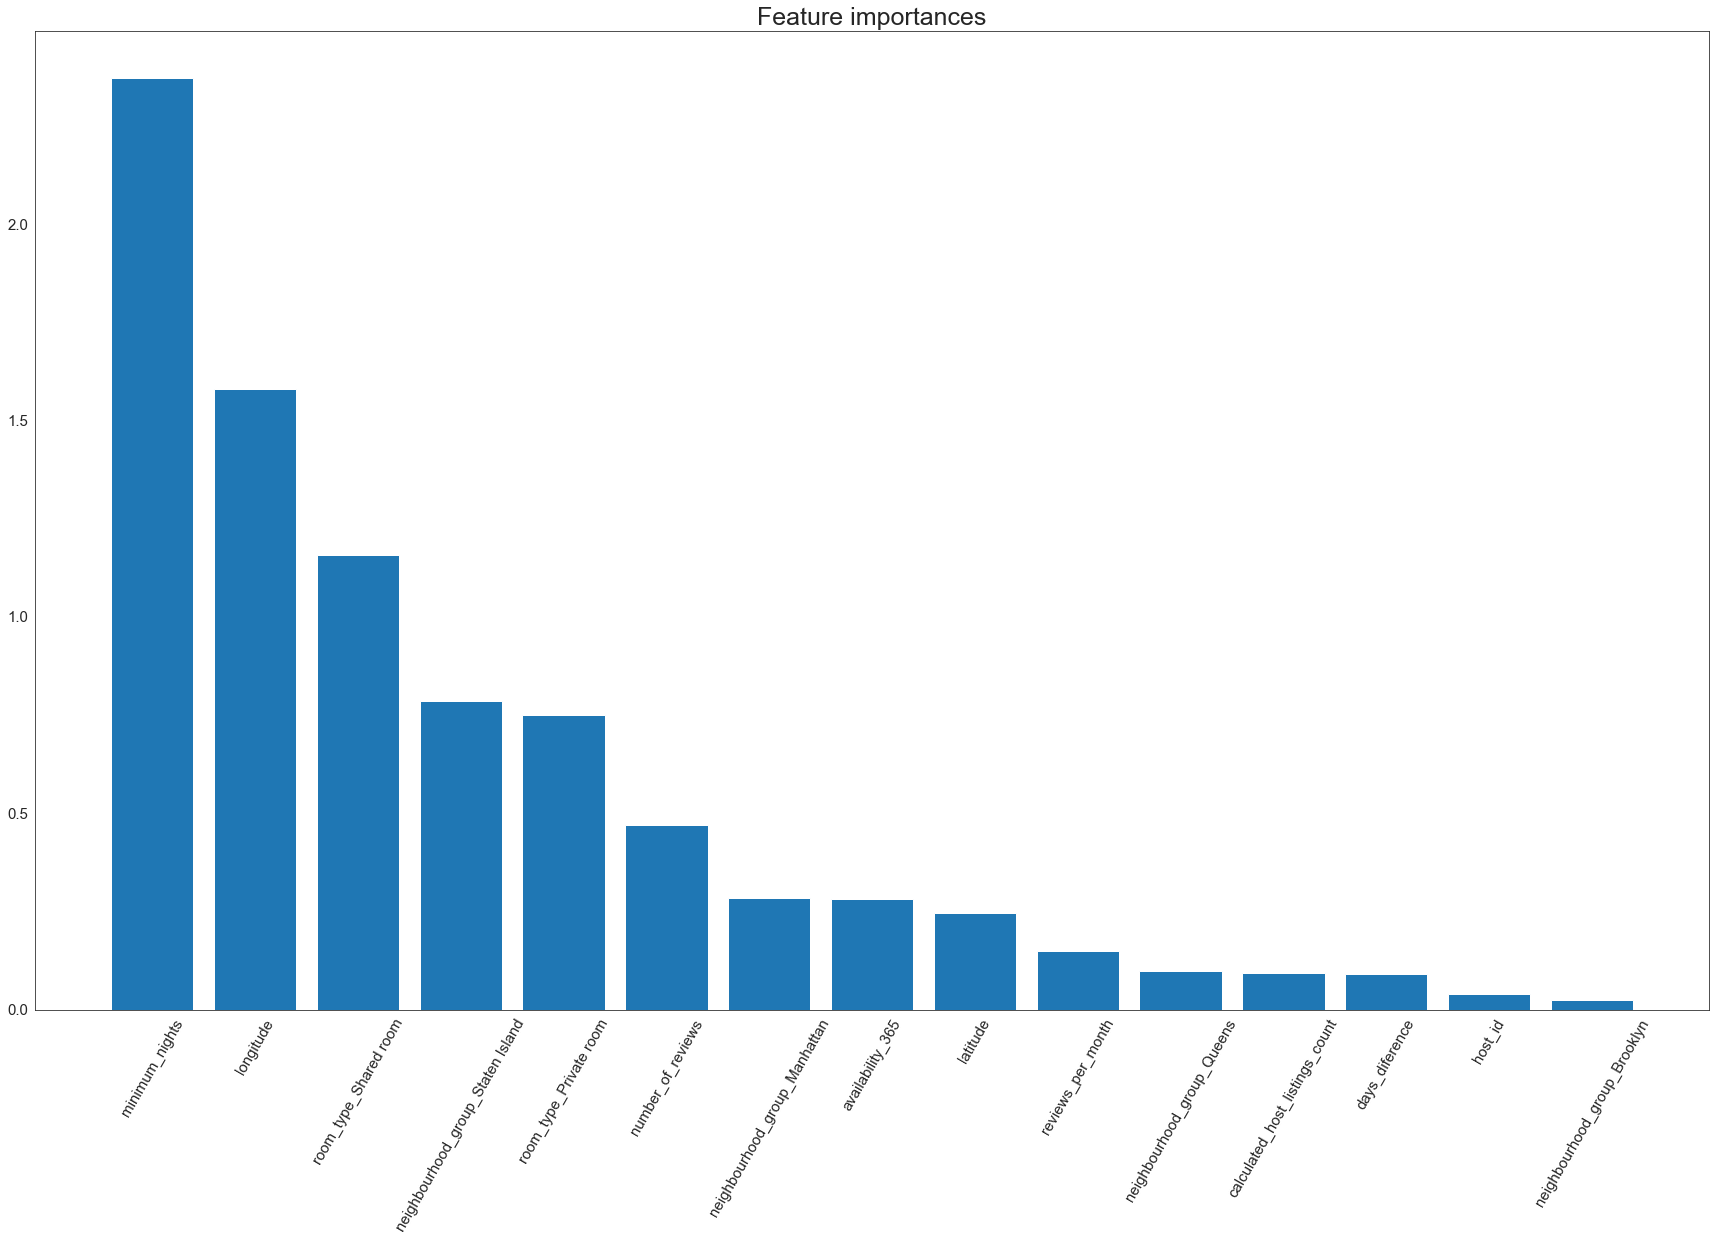

In [21]:
#importance features
sns.set_style("white")
plt.figure (figsize = (30,18))
importance = np.abs(lasso.coef_)
#importance = np.argsort(importance)
feature_names = np.array(X_train_knn_imputed.columns)
df = pd.DataFrame({'Features': feature_names, 'Importance': importance})
df = df.sort_values('Importance', ascending=False)
plt.bar('Features', 'Importance', data=df)
plt.title("Feature importances", fontsize=25)
plt.xticks(rotation=60, fontsize=15)
plt.yticks(fontsize=15)
plt.show()


### MODELO 3: LightGBM

Para esse modelo usaremos os dados sem a padronização.

In [22]:
#treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
#imputando os valores ausentes nos dados de treino (knn imputer) nos dados copiados
X_train_knn_imputed = X_train.copy(deep=True)
X_test_knn_imputed = X_test.copy(deep=True)
# transformação
knn_imp = KNNImputer(n_neighbors=3).fit(X_train_knn_imputed)
# Fit/transform train
X_train_knn_imputed = pd.DataFrame(knn_imp.transform(X_train_knn_imputed), columns=X_train_knn_imputed.columns)
#transform test
X_test_knn_imputed = pd.DataFrame(knn_imp.transform(X_test_knn_imputed), columns=X_test_knn_imputed.columns)

## light gbm
lgbm = lgb.LGBMRegressor(random_state=42)
cv = KFold(random_state=42, n_splits=5, shuffle=True)

#fit
lgbm.fit(X_train_knn_imputed, y_train)

#predict
lgbm_pred = lgbm.predict(X_test_knn_imputed)
df_comp = pd.DataFrame({'Real': np.expm1(y_test),
                       'Predição' : np.expm1(lgbm_pred)})
df_comp['Predição'] = df_comp['Predição'].round(2)

df_comp.head(15)


,Real,Predição
4556,110.0,166.68
31590,290.0,336.25
30073,125.0,122.18
19566,250.0,147.51
13125,259.0,298.79
2540,45.0,58.82
27850,650.0,281.23
21369,65.0,69.07
20656,50.0,64.63
2649,330.0,228.85


In [23]:
print('Preço médio:', np.round(np.mean(y_train), 2))  
print('Desvio Padrão do preço:', np.round(np.std(y_train), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lgbm.predict(X_test_knn_imputed))), 2))
print('R2 score train:', np.round(r2_score(y_train, lgbm.predict(X_train_knn_imputed), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lgbm.predict(X_test_knn_imputed), multioutput='variance_weighted'), 2))

Preço médio: 4.74
Desvio Padrão do preço: 0.69
RMSE: 0.44
R2 score train: 0.67
R2 score test: 0.6


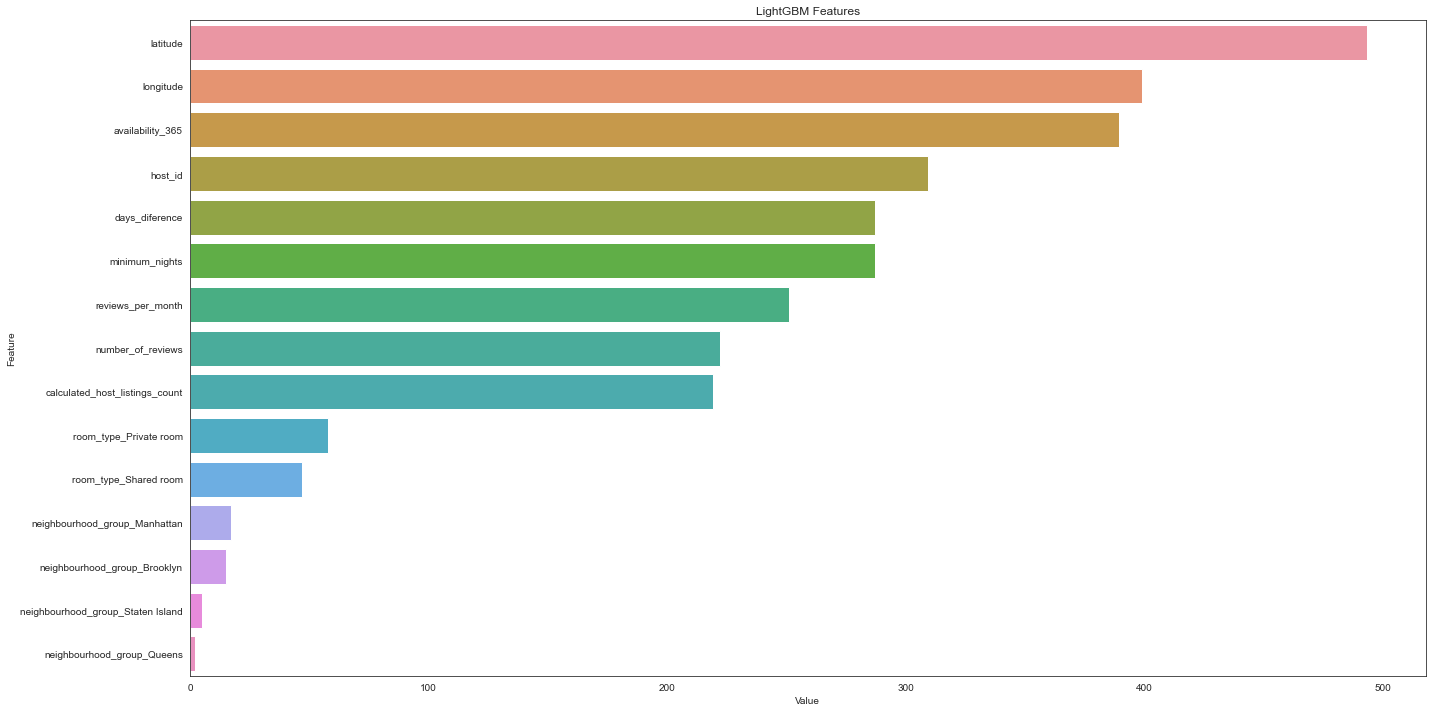

In [24]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_,X_train_knn_imputed.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()


### MODELO 4: RANDOM FOREST

Para esse modelo usaremos os dados sem a padronização.

In [25]:
## Random Forest
cv = KFold(random_state=42, n_splits=5, shuffle=True)
rf = RandomForestRegressor(random_state=42)


#fit
rf.fit(X_train_knn_imputed, y_train)

#predict
rf_pred = rf.predict(X_test_knn_imputed)

#Comparando
df_comp = pd.DataFrame({'Real': np.expm1(y_test),
                       'Predição' : np.expm1(rf_pred)})
df_comp['Predição'] = df_comp['Predição'].round(2)

df_comp.head(15)


,Real,Predição
4556,110.0,166.62
31590,290.0,213.22
30073,125.0,113.89
19566,250.0,152.26
13125,259.0,378.54
2540,45.0,65.19
27850,650.0,455.24
21369,65.0,73.32
20656,50.0,71.77
2649,330.0,216.02


In [26]:
print('Preço médio:', np.round(np.mean(y_train), 2))  
print('Desvio Padrão do preço:', np.round(np.std(y_train), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rf.predict(X_test_knn_imputed))), 2))
print('R2 score train:', np.round(r2_score(y_train, rf.predict(X_train_knn_imputed), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rf.predict(X_test_knn_imputed), multioutput='variance_weighted'), 2))

Preço médio: 4.74
Desvio Padrão do preço: 0.69
RMSE: 0.44
R2 score train: 0.94
R2 score test: 0.59


Vamos tunar os hiperparâmetros do modelo Random Forest e verificar novamente seu desempenho

In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 500, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [3, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=1, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train_knn_imputed, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [50, 162, 275, 387, 500],
                                        'min_samples_split': [3, 5, 10],
                                        'n_estimators': [5, 60, 115, 170, 225,
                                                         280, 335, 390, 445,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [28]:
rf_random.best_params_

{'n_estimators': 445, 'min_samples_split': 10, 'max_depth': 387}

In [29]:
#predict
rf_random_pred = rf_random.predict(X_test_knn_imputed)

df_comp = pd.DataFrame({'Real': np.expm1(y_test),
                       'Predição' : np.expm1(rf_random_pred)})
df_comp['Predição'] = df_comp['Predição'].round(2)

df_comp.head(15)

,Real,Predição
4556,110.0,189.53
31590,290.0,242.77
30073,125.0,118.23
19566,250.0,148.78
13125,259.0,337.56
2540,45.0,60.98
27850,650.0,524.66
21369,65.0,71.29
20656,50.0,71.02
2649,330.0,213.19


In [30]:
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rf_random.predict(X_test_knn_imputed))), 2))
print('R2 score train:', np.round(r2_score(y_train, rf_random.predict(X_train_knn_imputed), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rf_random.predict(X_test_knn_imputed), multioutput='variance_weighted'), 2))

RMSE: 0.44
R2 score train: 0.87
R2 score test: 0.6


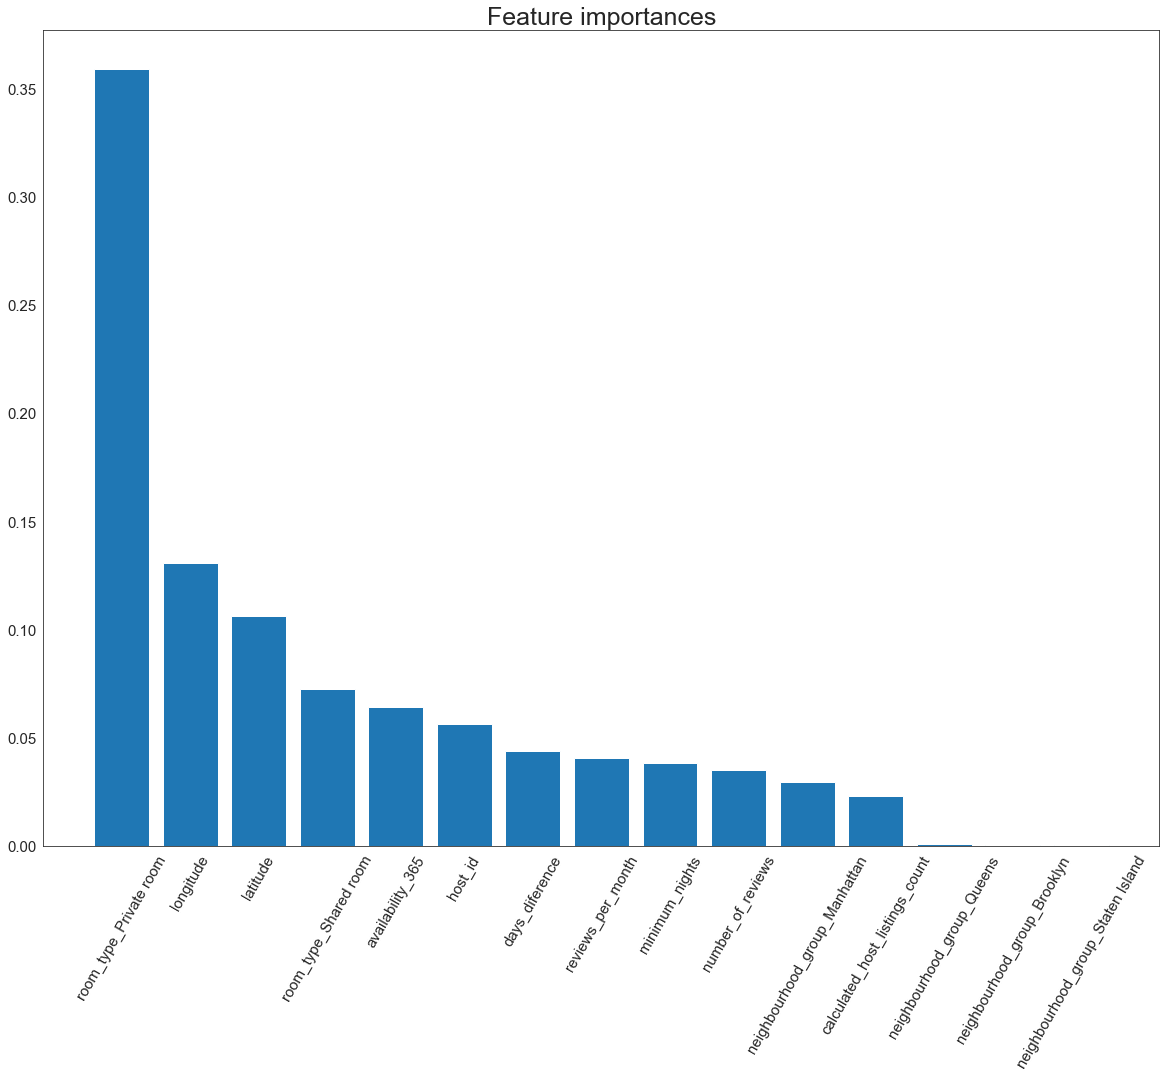

In [31]:
#importance features
sns.set_style("white")
plt.figure (figsize = (20,15))
importance = np.abs(rf_random.best_estimator_.feature_importances_)
#importance = np.argsort(importance)
feature_names = np.array(X_train_knn_imputed.columns)
df = pd.DataFrame({'Features': feature_names, 'Importance': importance})
df = df.sort_values('Importance', ascending=False)
plt.bar('Features', 'Importance', data=df)
plt.title("Feature importances", fontsize=25)
plt.xticks(rotation=60, fontsize=15)
plt.yticks(fontsize=15)
plt.show()


## MODELO 5: REGRESSÃO LASSO (sem os outliers)

vamos testar novamente o modelo lasso considerando apenas os casos onde a variável *price* apresenta valor abaixo de $\$350.00$ ($95\%$ dos dados). Para esse modelo usaremos os dados padronizados.

In [32]:
dados = pd.read_csv('train.csv')
dados = dados[dados['price']<350]

In [33]:
dados['price'] = np.log1p(dados['price'])
#coluna com a diferenca de dias do last_review em relação ao ultimo registro de dia
dados['last_review']=pd.to_datetime(dados['last_review'])
dados['days_diference'] = (dados['last_review'].max() - dados['last_review']).dt.days


#variáveis dummies
categoricas = dados[["neighbourhood_group", "room_type", "neighbourhood"]]
categoricas_dummies = pd.get_dummies(categoricas, drop_first=True)

#removendo as colunas categoricas para incluir as dummies
dados = dados.drop(["neighbourhood_group", "room_type","neighbourhood"], axis=1)
dados = pd.concat([dados, categoricas_dummies], axis=1)

#treino e teste
X = dados.drop(columns=['price', 'id', 'host_name', 'name', 'last_review']) #retirando as variáveis não importantes
y = dados.price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

#pre-processamento dos dados
scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


#imputando os valores ausentes nos dados de treino (knn imputer) nos dados copiados
X_train_knn_imputed = X_train.copy(deep=True)
X_test_knn_imputed = X_test.copy(deep=True)
# transformação
knn_imp = KNNImputer(n_neighbors=3).fit(X_train_knn_imputed)
# Fit/transform train
X_train_knn_imputed = pd.DataFrame(knn_imp.transform(X_train_knn_imputed), columns=X_train_knn_imputed.columns)
#transform test
X_test_knn_imputed = pd.DataFrame(knn_imp.transform(X_test_knn_imputed), columns=X_test_knn_imputed.columns)


In [34]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = np.linspace(0,0.2,20)
lasso = LassoCV(alphas=alphas, cv=cv, n_jobs=-1, verbose=1)
lasso.fit(X_train_knn_imputed, y_train)

#predict
lasso_pred = lasso.predict(X_test_knn_imputed)

#comparando
df_comp = pd.DataFrame({'Real': np.expm1(y_test),
                       'Predição' : np.expm1(lasso_pred)})

df_comp['Predição']=df_comp['Predição'].round(2)

df_comp.head(15)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
....................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


,Real,Predição
30107,90.0,121.19
24228,119.0,147.41
6367,120.0,185.55
23518,100.0,76.56
30794,97.0,114.29
28374,60.0,62.84
29183,95.0,104.95
10093,299.0,199.05
19591,70.0,75.21
24355,57.0,58.89


In [35]:
print('Preço médio:', np.round(np.mean(y_train), 2))  
print('Desvio Padrão do preço:', np.round(np.std(y_train), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test_knn_imputed))), 2))
print('R2 score train:', np.round(r2_score(y_train, lasso.predict(X_train_knn_imputed), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lasso.predict(X_test_knn_imputed), multioutput='variance_weighted'), 2))

Preço médio: 4.64
Desvio Padrão do preço: 0.58
RMSE: 0.38
R2 score train: 0.6
R2 score test: 0.58


## Considerações finais

O modelo 1, ou Modelo de Regressão Linear Ponderada, nos permite dar 'pesos' de acordo com a variável de escolha. No nosso caso, pode ser interessante a relação entre o preço e quantos dias se passaram desde a última vez que o imóvel foi visualizado, por isso a sua escolha. Certamente quanto mais o tempo passa, 'menos confiáveis' ficam esses dados em virtude dos impactos econômicos. Em relação as métricas, esse modelo apresentou um *RMSE* de $0.51$ e um $R^{2}$ de $0.48$ para os dados de treino e $0.47$ para os dados de teste.

Já o modelo 2, ou Modelo de Regressão Lasso, também conhecido como regressão penalizada, aplica uma penalidade reduzindo os coeficientes, em alguns casos até próximo de zero. Tal modelo apresentou um *RMSE* de $0.5$ e um $R^{2}$ de $0.49$ para os dados de treino e $0.49$ para os dados de teste, desempenho muito próximo do modelo anterior.

O modelo 3, ou Modelo LightGBM, apresenta uma estrutura de aumento de gradiente e usa algoritmos de aprendizagem baseados em árvore. Com ele conseguimos um aumento no $R^{2}$, tanto de treino (0.67), quanto de teste (0.6) e uma diminuição no *RMSE* (0.44).


O modelo 4 (Random Forest), ou floresta aleatória, que se baseia na aplicação de *bagging* em árvores de decisão. O mesmo apresentou um desempenho similar ao modelo 3 em relação ao *RMSE* (0.44) e o que chamou a atenção foi  a discrepância apresentada no $R^{2}$ para os dados de treino (0.94) em relacão aos dados de teste (0.59). Deve-se ter uma maior atenção nesses casos, visto que ele se ajusta muito bem aos dados de treino e não tão bem assim aos dados de teste (possibilidade de overfitting). Com a tunagem dos hiperparâmetros essa diferença teve uma leve diminuição, mas ainda é necessário olhar com mais cuidado para esses casos.

Finalizando com o modelo 5, utilizamos novamente a regressão lasso, porém com os valores da variável *price* abaixo de $\$350.00$. O *RMSE* baixou para 0.38 e o $R^{2}$ próximo de 0.6, tanto para treino quanto para teste.

Em todos os modelos foi utilizado a validação cruzada.

